# Programming Assignment II

In [1]:
import numpy as np

eta = 0.1
mu = 0.9

d_in, d_out = 785, 10
d_hidden = 64
sizes = [d_in, d_hidden, d_out]
sizes_narrow = sizes.copy()
sizes_narrow[1] /= 2
sizes_wide = sizes.copy()
sizes_wide[1] *= 2
# Solve the new dimension from old dimension
d_new = int((np.sqrt(795 ** 2 + 4 * 795 * d_hidden) - 795) / 2)
print('New hidden layer dimension is', d_new)
sizes_deep = [d_in, d_new, d_new, d_out]

epoch_min, epoch_max = 20, 20

New hidden layer dimension is 59


In [2]:
from toynn.data import read_data_sets

dss = read_data_sets()

## Classification

### Checking Gradients

### Gradient Descent

In [3]:
from toynn.network import NaiveNetwork
from toynn.tools import train

result_naive = train(
    NaiveNetwork(sizes), dss,
    update_params=dict(eta=eta),
    epoch_min=epoch_min, epoch_max=epoch_max
)

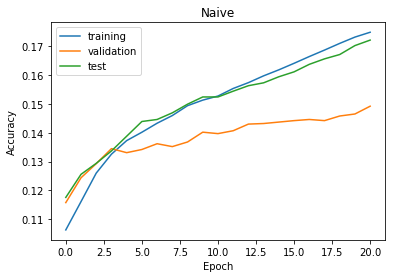

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

result_naive.plot_history('accuracy')
plt.title('Naive')
plt.savefig('figs/naive.pdf')

## Tricks of the Trade

In [5]:
from toynn.network import TrickNetwork

result_trick = train(
    TrickNetwork(sizes), dss,
    update_params=dict(eta=eta, mu=mu),
    epoch_min=epoch_min, epoch_max=epoch_max
)

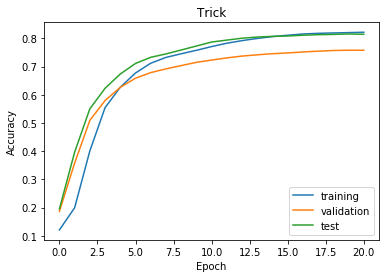

In [6]:
result_trick.plot_history('accuracy')
plt.title('Trick')
plt.savefig('figs/trick.pdf')

## Network Topology

### Number of Hidden Units

In [7]:
result_narrow = train(
    TrickNetwork(sizes_narrow), dss,
    update_params=dict(eta=eta, mu=mu),
    epoch_min=epoch_min, epoch_max=epoch_max
)

/Users/qobilidop/Desktop/CSE-253-PA/2/toynn/layer.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.w = np.empty((self.prev.size, size))


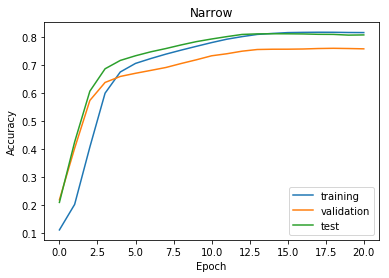

In [8]:
result_narrow.plot_history('accuracy')
plt.title('Narrow')
plt.savefig('figs/narrow.pdf')

In [9]:
result_wide = train(
    TrickNetwork(sizes_wide), dss,
    update_params=dict(eta=eta, mu=mu),
    epoch_min=epoch_min, epoch_max=epoch_max
)

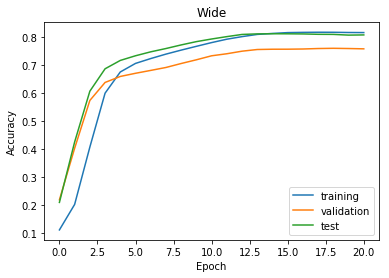

In [10]:
result_narrow.plot_history('accuracy')
plt.title('Wide')
plt.savefig('figs/wide.pdf')

### Number of Hidden Layers

In [11]:
%%time
result_deep = train(
    TrickNetwork(sizes_deep), dss,
    update_params=dict(eta=eta, mu=mu),
    epoch_min=epoch_min, epoch_max=epoch_max
)

CPU times: user 34.7 s, sys: 4.33 s, total: 39 s
Wall time: 20.8 s


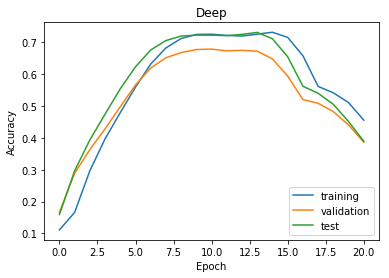

In [12]:
result_deep.plot_history('accuracy')
plt.title('Deep')
plt.savefig('figs/deep.pdf')